/home/gps/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in power


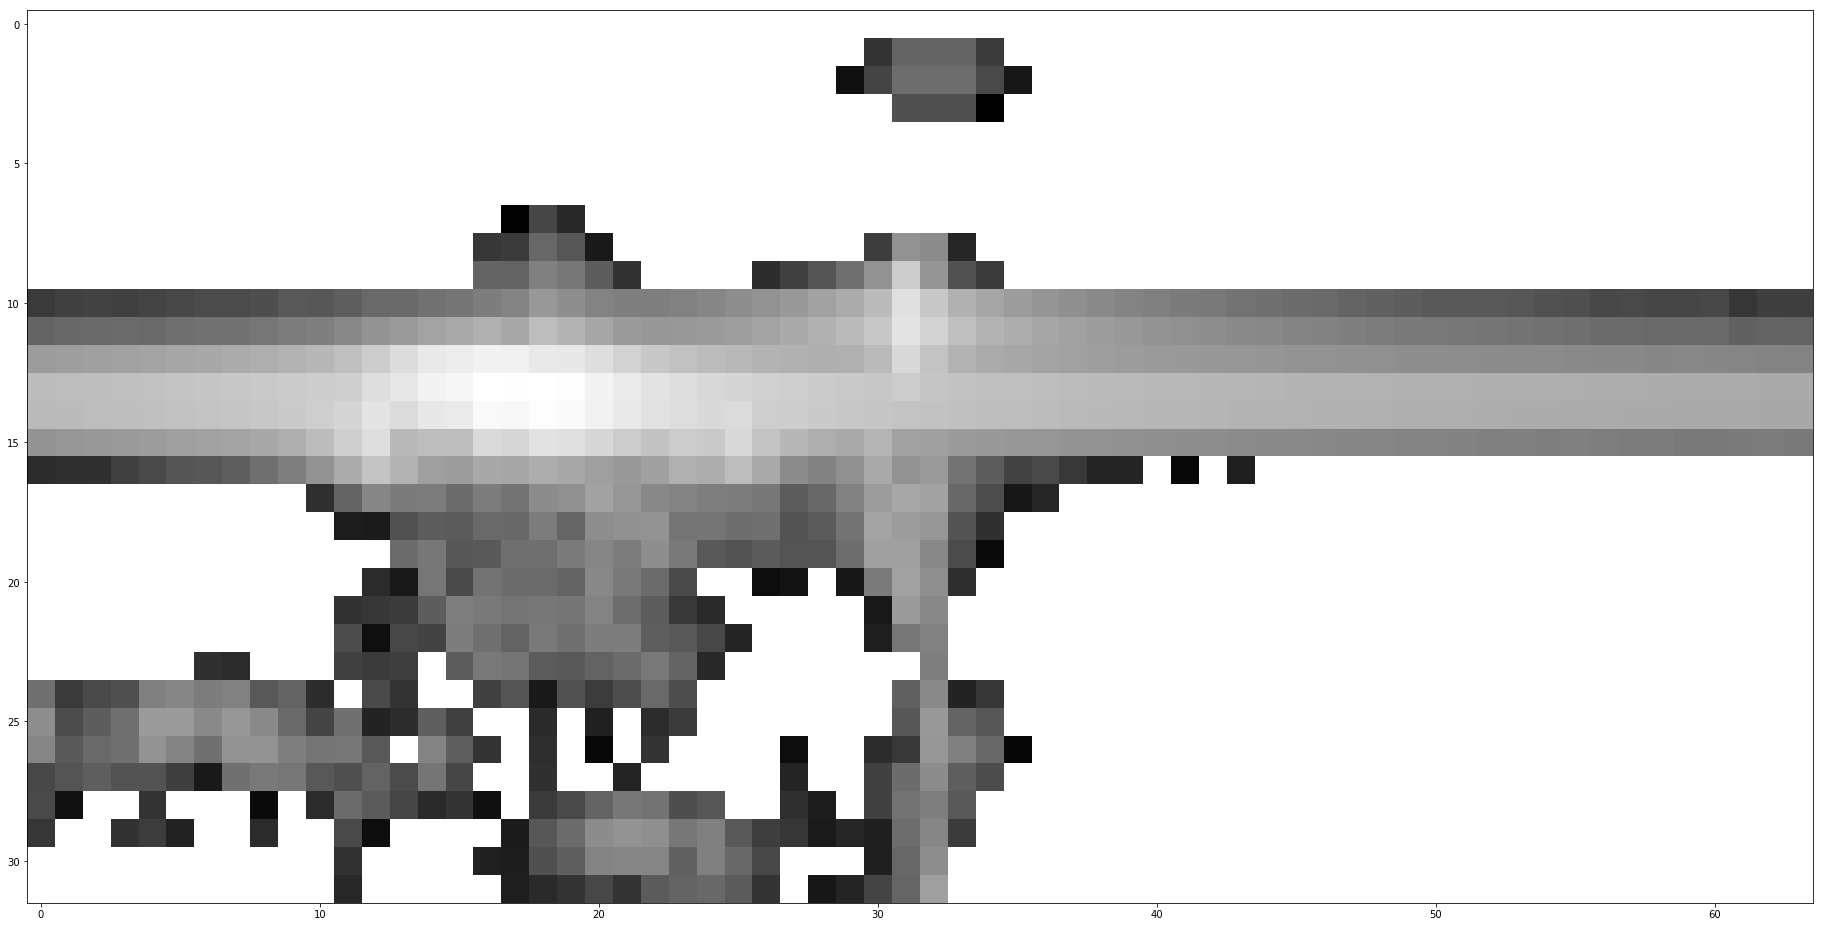

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
import numpy as np


matrix = np.loadtxt('push_004_frame1.txt')
# matrix = np.expand_dims(matrix, axis=2)

# 伽马变换
gamma = 0.4
out = np.power(matrix, gamma)

# cv2.imwrite("./matrix1.jpg",img)#保存图像
plt.figure(figsize=(32,64))
plt.imshow(out, cmap=plt.cm.gray)
plt.show()

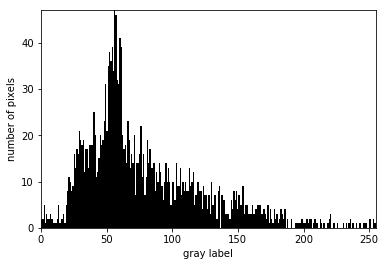

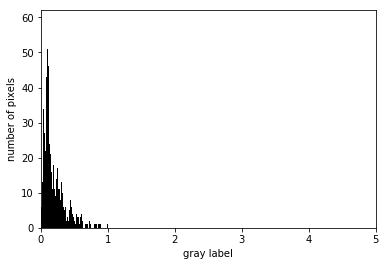

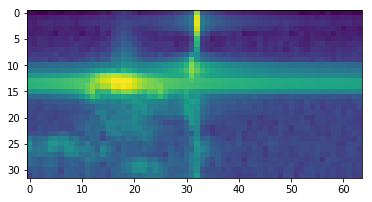

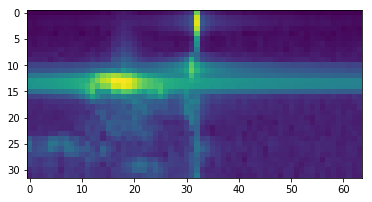

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
import numpy as np

#--------------------- 函数 ---------------------------------
"""计算的均值以及矩阵的最大、最小值存为变量放到循环里，如果直接在循环里计算对应的值会造成归一化特别慢"""
def MaxMinNormalization(x,Max,Min):
    x = (x - Min) / (Max - Min);
    return x

def Z_ScoreNormalization(x,mu,sigma):#LaTex：{x}_{normalization}=\frac{x-\mu }{\sigma }
    x = (x - mu) / sigma;
    return x;

def sigmoid(x,useStatus):#LaTex：{x}_{normalization}=\frac{1}{1+{e}^{-x}}
    if useStatus:
        return 1.0 / (1 + np.exp(-float(x)));
    else:
        return float(x);

def grayHist(img,ax):
    h, w = img.shape[:2]
    pixelSequence = img.reshape([h * w, ])
    numberBins = 256
    histogram, bins, patch = plt.hist(pixelSequence, numberBins,
                                      facecolor='black', histtype='bar')
    plt.xlabel("gray label")
    plt.ylabel("number of pixels")
    plt.axis([0, ax, 0, np.max(histogram)])
    plt.show()
    
    
#--------------------- 加载 ---------------------------------
matrix = np.loadtxt('push_004_frame1.txt')
onehot = MaxMinNormalization(matrix,np.max(matrix),np.min(matrix))
img = onehot*255


#--------------------- 处理 ---------------------------------

# 伽马变换
gamma = 1.5
out = np.power(onehot, gamma)
np.savetxt('out.txt',out)

# 分别绘制处理前后的直方图
grayHist(img,255)
grayHist(out,5)

#---------------------- 显示 --------------------------------

plt.imshow(img)
plt.show()
plt.imshow(out)
plt.show()

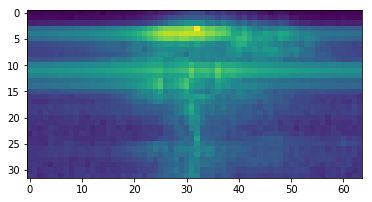

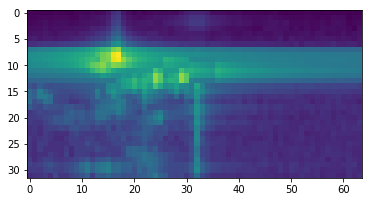

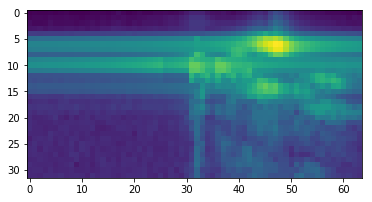

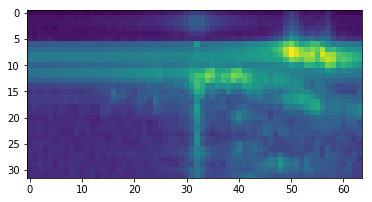

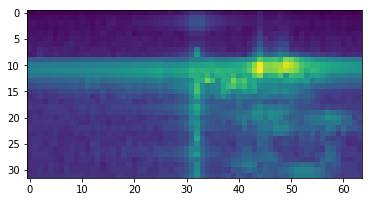

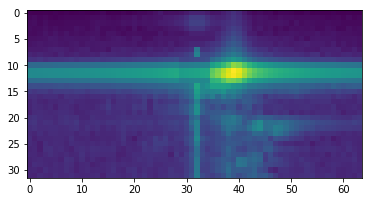

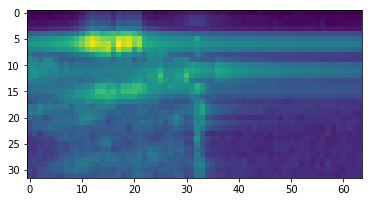

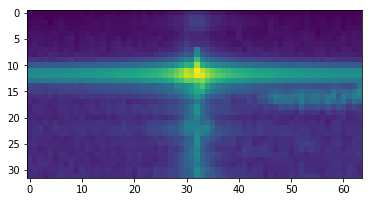

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
import numpy as np
import os

#--------------------- 函数 ---------------------------------
"""计算的均值以及矩阵的最大、最小值存为变量放到循环里，如果直接在循环里计算对应的值会造成归一化特别慢"""
def MaxMinNormalization(x,Max,Min):
    x = (x - Min) / (Max - Min);
    return x

def Z_ScoreNormalization(x,mu,sigma):#LaTex：{x}_{normalization}=\frac{x-\mu }{\sigma }
    x = (x - mu) / sigma;
    return x;

def sigmoid(x,useStatus):#LaTex：{x}_{normalization}=\frac{1}{1+{e}^{-x}}
    if useStatus:
        return 1.0 / (1 + np.exp(-float(x)));
    else:
        return float(x);

def grayHist(img):
    h, w = img.shape[:2]
    pixelSequence = img.reshape([h * w, ])
    numberBins = 256
    histogram, bins, patch = plt.hist(pixelSequence, numberBins,
                                      facecolor='black', histtype='bar')
    plt.xlabel("gray label")
    plt.ylabel("number of pixels")
    plt.axis([0, 255, 0, np.max(histogram)])
    plt.show()

def gamaTxt(filePath,fileName,outPath):
    matrix = np.loadtxt(os.path.join(filePath,fileName))
    onehot = MaxMinNormalization(matrix,np.max(matrix),np.min(matrix))
    img = onehot*255
    # 伽马变换
    gamma = 1.5
    out = np.power(onehot, gamma)
    np.savetxt(os.path.join(outPath,fileName[:-4]+'out.txt'),out)

"""生成gama处理结果"""
source_dir = './peak'
dest_dir = './out'
files = os.listdir(source_dir)
if not os.path.exists(dest_dir):
    os.mkdir(dest_dir)
for file in files:
    gamaTxt(source_dir,file,dest_dir)
    
    
"""显示"""
dirs = './out'
files = os.listdir(dirs)
for file in files:
    img = np.loadtxt(os.path.join(dirs,file))
    plt.imshow(img)
    plt.show()